## LSTM Model 

This model will use a dataset generated on this code based on timeseries data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
url="https://gitlab.com/ivan.jesus.torres/pmrl-tesla/-/raw/main/Datasets/Generated%20datasets/forecasting.csv"
df_ann = pd.read_csv(url)

print(df_ann.head())

                  date       close        high  ...     DMP_14  DMN_14  TTM_TRND_6
0  2020-04-14 13:00:00  146.417999  148.376007  ...  82.036626     0.0           1
1  2020-04-14 14:00:00  144.806000  147.459991  ...  59.184050     0.0           1
2  2020-04-14 15:00:00  145.809998  146.990005  ...  52.542707     0.0           1
3  2020-04-14 16:00:00  146.475006  147.395981  ...  50.223569     0.0           1
4  2020-04-14 17:00:00  145.565002  147.736404  ...  46.857649     0.0           1

[5 rows x 18 columns]


In [ ]:
time_vector = list(df_ann['date'])
print(time_vector)

['2020-04-14 13:00:00', '2020-04-14 14:00:00', '2020-04-14 15:00:00', '2020-04-14 16:00:00', '2020-04-14 17:00:00', '2020-04-14 18:00:00', '2020-04-14 19:00:00', '2020-04-15 13:00:00', '2020-04-15 14:00:00', '2020-04-15 15:00:00', '2020-04-15 16:00:00', '2020-04-15 17:00:00', '2020-04-15 18:00:00', '2020-04-15 19:00:00', '2020-04-16 13:00:00', '2020-04-16 14:00:00', '2020-04-16 15:00:00', '2020-04-16 16:00:00', '2020-04-16 17:00:00', '2020-04-16 18:00:00', '2020-04-16 19:00:00', '2020-04-17 13:00:00', '2020-04-17 14:00:00', '2020-04-17 15:00:00', '2020-04-17 16:00:00', '2020-04-17 17:00:00', '2020-04-17 18:00:00', '2020-04-17 19:00:00', '2020-04-20 13:00:00', '2020-04-20 14:00:00', '2020-04-20 15:00:00', '2020-04-20 16:00:00', '2020-04-20 17:00:00', '2020-04-20 18:00:00', '2020-04-20 19:00:00', '2020-04-21 13:00:00', '2020-04-21 14:00:00', '2020-04-21 15:00:00', '2020-04-21 16:00:00', '2020-04-21 17:00:00', '2020-04-21 18:00:00', '2020-04-21 19:00:00', '2020-04-22 13:00:00', '2020-04-2

In [ ]:
df_ann.shape

(1741, 18)

In [ ]:
df_ann.head(1)

,date,close,high,low,volume,tesla,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,TTM_TRND_6
0,2020-04-14 13:00:00,146.417999,148.376007,138.731995,11488192.0,92.0,135.1941,141.118793,147.043486,8.396746,100.0,4.47009,-0.267105,4.737195,100.0,82.036626,0.0,1


In [ ]:
titles = [
    "Close",
    "High",
    "Low",
    "Volume",
    "Pytrends",
    "BBL_5_2.0",
    "BBM_5_2.0",
    "BBU_5_2.0",
    "BBB_5_2.0",
    "RSI_14",
    "MACD_12_26_9",
    "MACDh_12_26_9",
    "MACDs_12_26_9",
    "ADX_14",
    "DMP_14",
    "DMN_14",
    "TTM_TRND_6",
]

feature_keys = [
    "close",
    "high",
    "low",
    "volume",
    "tesla",
    "BBL_5_2.0",
    "BBM_5_2.0",
    "BBU_5_2.0",
    "BBB_5_2.0",
    "RSI_14",
    "MACD_12_26_9",
    "MACDh_12_26_9",
    "MACDs_12_26_9",
    "ADX_14",
    "DMP_14",
    "DMN_14",
    "TTM_TRND_6",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
]

In [ ]:
final_dataset = df_ann.values
print(final_dataset)

[['2020-04-14 13:00:00' 146.41799926757812 148.37600708007812 ...
  82.03662616800874 0.0 1]
 ['2020-04-14 14:00:00' 144.80599975585938 147.45999145507812 ...
  59.18404993096201 0.0 1]
 ['2020-04-14 15:00:00' 145.80999755859375 146.99000549316406 ...
  52.542707014034136 0.0 1]
 ...
 ['2021-04-09 17:00:00' 672.2484741210938 678.489990234375 ...
  8.724925265169142 28.76674492586141 -1]
 ['2021-04-09 18:00:00' 674.3499755859375 675.1434936523438 ...
  7.858872548389728 26.925962265490185 -1]
 ['2021-04-09 19:00:00' 677.02001953125 677.489990234375 ...
  12.984387880942169 24.862114565405715 1]]


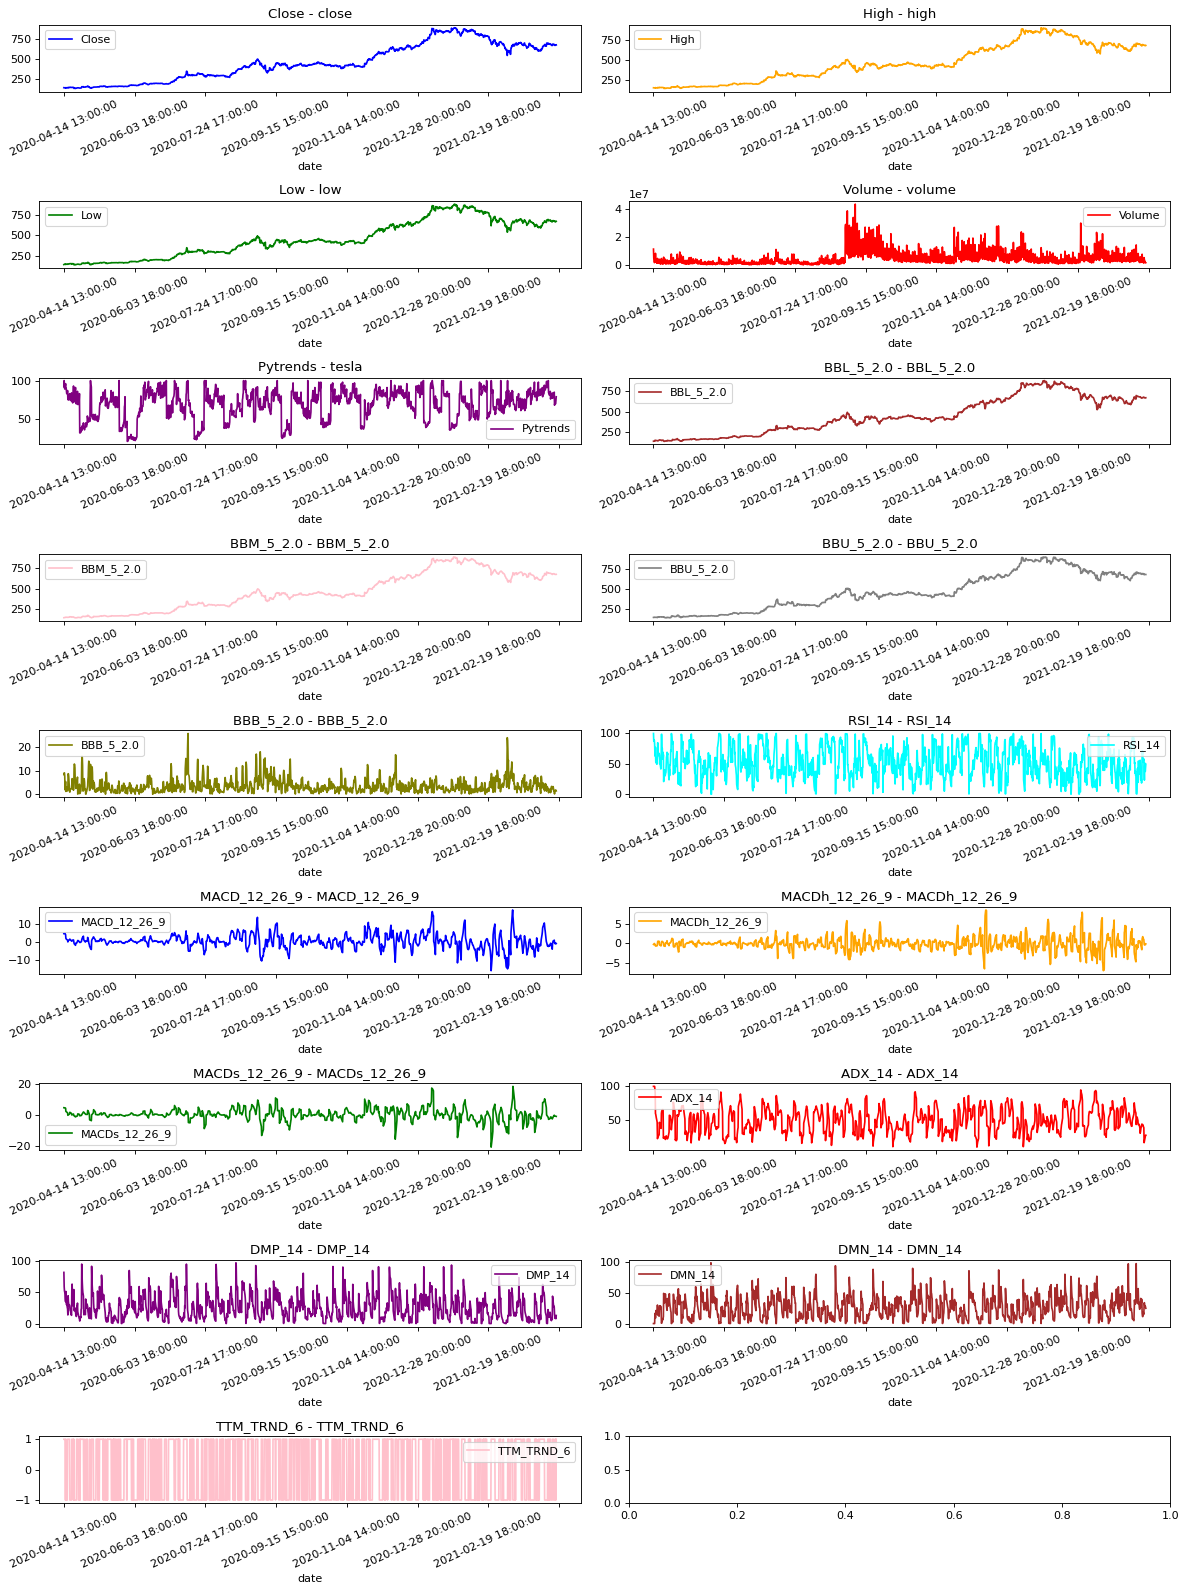

In [ ]:
date_time_key = "date"
def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=9, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df_ann)

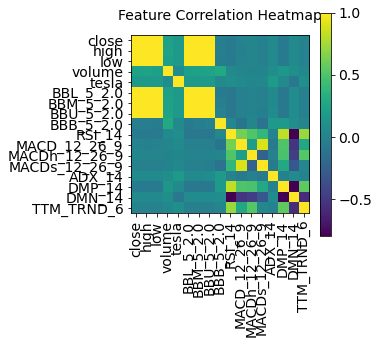

In [ ]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df_ann[feature_keys])

## Variables declaration

Definition of some variables to generate the datasets and to train the model.

In [ ]:
split_fraction = 0.8 # 80% of data for training
train_split = int(split_fraction * int(df_ann.shape[0]))
step = 1 # How much time passes between data. We have data every hour so 1

past = 5*6 # Number of days * 6 hours (Time that the market is open - 1 hour)=> Use data from 30 previous hours
future = 1 #Do the prediction 1 hour after the actual hour
learning_rate = 0.00001 #Learning rate
batch_size = 526 #256
epochs = 800 #800


## Select variables to use

According to the correlation map to predict the close value we will use the high, low and the BBL, BBM, BBU values. To them we will add the pytrends value and the volume because they do not have a very low correlation to the close value and we consider them important.

In [ ]:
import numpy as np
selec=np.array([0,1,2,3,4,5,6,7])
print(selec+1)
print(selec.size)

[1 2 3 4 5 6 7 8]
8


Checking variables

In [ ]:
#print(final_dataset.shape)
final_no_date=final_dataset[:,selec+1]
#print(final_no_date)

## Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in selec]),
)
selected_features = [feature_keys[i] for i in selec]
features = df_ann[selected_features]
features.index = df_ann[date_time_key]
print(features.head())
features=features.values

scaler = MinMaxScaler(feature_range=(0, 1))

features = pd.DataFrame(features[:,:])
features[features.columns] = scaler.fit_transform(features[features.columns]) # Scale features by columns (as univariable)

print(features.shape)
print(features.head())

features_scaled_w_date=pd.DataFrame(features)
features_scaled_w_date.insert(0,"date",df_ann[date_time_key])

#print(features_scaled_w_date.head())

train_data = features.loc[0 : train_split - 1]

#print(train_data)

val_data = features.loc[train_split:]

The selected parameters are: Close, High, Low, Volume, Pytrends, BBL_5_2.0, BBM_5_2.0, BBU_5_2.0
                          close        high  ...   BBM_5_2.0   BBU_5_2.0
date                                         ...                        
2020-04-14 13:00:00  146.417999  148.376007  ...  141.118793  147.043486
2020-04-14 14:00:00  144.806000  147.459991  ...  142.121194  148.595632
2020-04-14 15:00:00  145.809998  146.990005  ...  143.324396  149.872011
2020-04-14 16:00:00  146.475006  147.395981  ...  144.660599  150.264763
2020-04-14 17:00:00  145.565002  147.736404  ...  145.814801  147.185867

[5 rows x 8 columns]
(1741, 8)
          0         1         2  ...         5         6         7
0  0.012035  0.011395  0.005281  ...  0.002011  0.001545  0.006420
1  0.009897  0.010191  0.008711  ...  0.002616  0.002882  0.008474
2  0.011229  0.009573  0.012813  ...  0.004123  0.004487  0.010164
3  0.012111  0.010107  0.014405  ...  0.007165  0.006270  0.010684
4  0.010904  0.010555  0.

In [ ]:
print(features[4])
selec.size

0       0.898734
1       1.000000
2       0.911392
3       0.860759
4       0.911392
          ...   
1736    0.632911
1737    0.620253
1738    0.620253
1739    0.670886
1740    0.734177
Name: 4, Length: 1741, dtype: float64


8

## Prepare train split

In [ ]:
start = past + future
end = start + train_split
print([i+1 for i in range(selec.size)])
x_train = train_data[[i for i in range(selec.size)]].values
#print(x_train)
print(features.head())
y_train = features.iloc[start:end][0]
#print(y_train)
sequence_length = int(past / step)
print(sequence_length)

[1, 2, 3, 4, 5, 6, 7, 8]
                  date         0         1  ...         5         6         7
0  2020-04-14 13:00:00  0.012035  0.011395  ...  0.002011  0.001545  0.006420
1  2020-04-14 14:00:00  0.009897  0.010191  ...  0.002616  0.002882  0.008474
2  2020-04-14 15:00:00  0.011229  0.009573  ...  0.004123  0.004487  0.010164
3  2020-04-14 16:00:00  0.012111  0.010107  ...  0.007165  0.006270  0.010684
4  2020-04-14 17:00:00  0.010904  0.010555  ...  0.014354  0.007809  0.006608

[5 rows x 9 columns]
30


Checking variables

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1392, 8)
(1392,)


Use keras.preprocessing.timeseries_dataset_from_array to generate the training set.

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

## Generate test split

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(selec.size)]].values
print(x_val.shape)
y_val = features.iloc[label_start:][[0]]
print(y_val.shape)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)
print(dataset_val)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

(318, 8)
(318, 1)
<BatchDataset shapes: ((None, None, 8), (None, 1)), types: (tf.float64, tf.float64)>
Input shape: (526, 30, 8)
Target shape: (526,)


In [ ]:
print(x_val.shape)

(318, 8)


In [ ]:
inputs.shape[2]

8

## Build model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

model = keras.Sequential()
model.add(layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(layers.LSTM(25,return_sequences=True))
model.add(layers.LSTM(20,return_sequences=True))
#model.add(layers.Conv1D(32, 3, padding="same", activation="sigmoid"))
model.add(layers.LSTM(25,return_sequences=True))
#model.add(layers.Conv1D(32, 3, padding="same", activation="sigmoid"))
model.add(layers.LSTM(20,return_sequences=True))
#model.add(layers.Conv1D(32, 3, padding="same", activation="relu"))
model.add(layers.LSTM(15,return_sequences=True))
model.add(Flatten())
model.add(layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse",metrics=[
        tf.keras.metrics.MeanSquaredError(),
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 30, 25)            3400      
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 20)            3680      
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 25)            4600      
_________________________________________________________________
lstm_8 (LSTM)                (None, 30, 20)            3680      
_________________________________________________________________
lstm_9 (LSTM)                (None, 30, 15)            2160      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 450)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
print(inputs.shape[1])

30


In [ ]:
print(dataset_train)

<BatchDataset shapes: ((None, None, 8), (None,)), types: (tf.float64, tf.float64)>


In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0000002, patience=25)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/800
3/3 [==============================] - 13s 716ms/step - loss: 0.2039 - mean_squared_error: 0.2039 - val_loss: 0.6305 - val_mean_squared_error: 0.6305

Epoch 00001: val_loss improved from inf to 0.63054, saving model to model_checkpoint.h5
Epoch 2/800
3/3 [==============================] - 0s 105ms/step - loss: 0.2030 - mean_squared_error: 0.2030 - val_loss: 0.6283 - val_mean_squared_error: 0.6283

Epoch 00002: val_loss improved from 0.63054 to 0.62831, saving model to model_checkpoint.h5
Epoch 3/800
3/3 [==============================] - 0s 97ms/step - loss: 0.2021 - mean_squared_error: 0.2021 - val_loss: 0.6260 - val_mean_squared_error: 0.6260

Epoch 00003: val_loss improved from 0.62831 to 0.62605, saving model to model_checkpoint.h5
Epoch 4/800
3/3 [==============================] - 0s 98ms/step - loss: 0.2012 - mean_squared_error: 0.2012 - val_loss: 0.6238 - val_mean_squared_error: 0.6238

Epoch 00004: val_loss improved from 0.62605 to 0.62378, saving model to model_che

## Visualize train and test loss

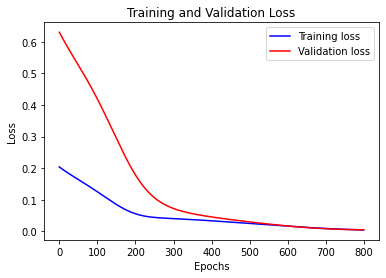

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

Checking variables

In [ ]:
dataset_val

<BatchDataset shapes: ((None, None, 8), (None, 1)), types: (tf.float64, tf.float64)>

In [ ]:
time_data = df_ann[date_time_key]
print(time_data)

0       2020-04-14 13:00:00
1       2020-04-14 14:00:00
2       2020-04-14 15:00:00
3       2020-04-14 16:00:00
4       2020-04-14 17:00:00
               ...         
1736    2021-04-09 15:00:00
1737    2021-04-09 16:00:00
1738    2021-04-09 17:00:00
1739    2021-04-09 18:00:00
1740    2021-04-09 19:00:00
Name: date, Length: 1741, dtype: object


In [ ]:
print(train_split+sequence_length)
print(label_start)

1422
1423


In [ ]:
print(train_split)

1392


Plot test close data

(289,)
date
2021-02-09 19:00:00    844.684998
2021-02-09 20:00:00    849.250000
2021-02-10 14:00:00    817.729980
2021-02-10 15:00:00    813.619995
2021-02-10 16:00:00    813.900024
                          ...    
2021-04-09 15:00:00    676.549988
2021-04-09 16:00:00    678.255005
2021-04-09 17:00:00    672.248474
2021-04-09 18:00:00    674.349976
2021-04-09 19:00:00    677.020020
Name: close, Length: 289, dtype: float64


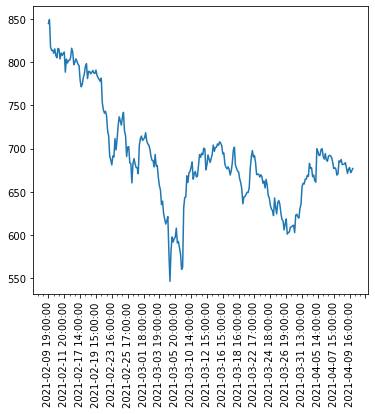

In [ ]:
import matplotlib.ticker as ticker
dates_for_plot=time_data[label_start+sequence_length-1:] #Get testing data dates
print(dates_for_plot.shape)
t_data=df_ann["close"] # Get testing data close values
print(t_data[label_start+sequence_length-1:])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(top=51,bottom = 50)
plt.plot(t_data[label_start+sequence_length-1:])

## Predict

Predict the data in the dataset and inverse scale it.

In [ ]:
y_hat=[]
y_hat_un=[]
for x, y in dataset_val:
    x_num=x.numpy()
    #print(x_num)
    x_num_shape=x_num.shape
    print(x_num_shape)
    #print(x[x_num_shape[0]-1,:,:])
    for j in range(x_num_shape[0]):
      x_ten=x[j,:,:]
      #print(x_ten)
      x_ten_re=tf.reshape(x_ten, [1,past,selec.size], name=None)
      #print(x_ten_re)
      #print(model.predict(x_ten_re))
      y_=model.predict(x_ten_re)
      y_hat.append(y_)
      x_un=scaler.inverse_transform(pd.DataFrame(x_ten))
      y_scaled=np.zeros([selec.size,selec.size])
      y_scaled[0]=y_
      y_un=scaler.inverse_transform(pd.DataFrame(y_scaled))[0,0]
      y_hat_un.append(y_un)
      #print(x_un)
      #print(y_un)
      #input("Press Enter to continue...")
    #print(model.predict(x_ten))
    #print(y)

#x_ten=x[x_num_shape[0]-1,:,:]
#x_ten_re=tf.reshape(x_ten, [1,30,15], name=None)
#print(x_ten_re)
#x_num=x.numpy()
#x_num_shape=x_num.shape
#print(model.predict(x_ten_re))
#print(y[x_num_shape[0]-1])

(289, 30, 8)


In [ ]:
#print(y_hat)

[array([[0.94582134]], dtype=float32), array([[0.9461351]], dtype=float32), array([[0.94628996]], dtype=float32), array([[0.9463522]], dtype=float32), array([[0.94625014]], dtype=float32), array([[0.94617575]], dtype=float32), array([[0.94609004]], dtype=float32), array([[0.946648]], dtype=float32), array([[0.9473099]], dtype=float32), array([[0.9482022]], dtype=float32), array([[0.9497046]], dtype=float32), array([[0.9513584]], dtype=float32), array([[0.9529329]], dtype=float32), array([[0.95457]], dtype=float32), array([[0.9554838]], dtype=float32), array([[0.95630884]], dtype=float32), array([[0.9570132]], dtype=float32), array([[0.9576948]], dtype=float32), array([[0.95830303]], dtype=float32), array([[0.95883566]], dtype=float32), array([[0.9592833]], dtype=float32), array([[0.9593431]], dtype=float32), array([[0.95937145]], dtype=float32), array([[0.9592008]], dtype=float32), array([[0.9588799]], dtype=float32), array([[0.9583548]], dtype=float32), array([[0.9577592]], dtype=floa

In [ ]:
print(len(y_hat))

289


date
2021-02-09 19:00:00   -92.347313
2021-02-09 20:00:00   -94.973032
2021-02-10 14:00:00   -61.277711
2021-02-10 15:00:00   -54.925824
2021-02-10 16:00:00   -53.038461
                         ...    
2021-04-09 15:00:00   -24.712185
2021-04-09 16:00:00   -26.206484
2021-04-09 17:00:00   -20.377102
2021-04-09 18:00:00   -20.332512
2021-04-09 19:00:00   -21.467091
Name: close, Length: 289, dtype: float64


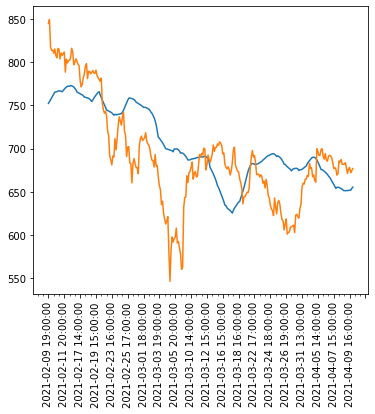

In [ ]:
#Image_FORECASTING_LSTM_1_0_0
import numpy as np
y_hat_un_np=np.array(y_hat_un)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(top=51,bottom = 50)
plt.plot(dates_for_plot,y_hat_un_np[:],'c.',label="Prediction")
plt.plot(dates_for_plot,t_data[label_start+sequence_length-1:],'g*',label="Real")
variation=y_hat_un_np[:]-t_data[label_start+sequence_length-1:]
plt.legend()
print(variation)

## Aplication

Compute the prediction for the given date and show the prediction and the real data.

2021-03-22 16:00:00
690.2000732421875


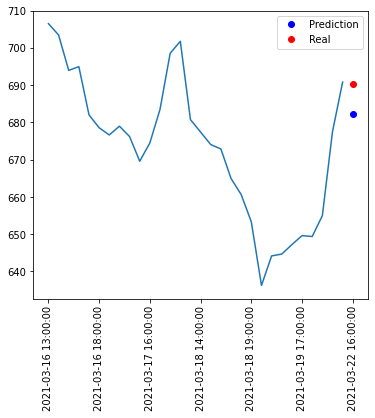

In [ ]:
from datetime import datetime
dt = datetime.strptime('2021-03-22 16:00:00', '%Y-%m-%d %H:%M:%S') # Moment to predict
mask = (features_scaled_w_date['date'] <= str(dt))
#print(features_scaled_w_date.shape)
features_scaled_w_date_tensor=features_scaled_w_date.loc[mask]
#print(features_scaled_w_date_tensor.shape)
dates_plot=features_scaled_w_date_tensor.iloc[-sequence_length-future-1:,:]
features_scaled_w_date_tensor=features_scaled_w_date_tensor.iloc[-sequence_length-future-1:-future-1,:]
#print(features_scaled_w_date_tensor.head())
tensor_single=tf.convert_to_tensor(features_scaled_w_date_tensor.iloc[:,1:])
#print(tensor_single)
x_ten_re_s=tf.reshape(tensor_single, [1,past,selec.size], name=None)


y_s=model.predict(x_ten_re_s)
x_un_s=scaler.inverse_transform(features_scaled_w_date_tensor.iloc[:,1:])
y_target=scaler.inverse_transform(dates_plot.iloc[:,1:])[sequence_length+future,0]

y_scaled_single=np.zeros([selec.size,selec.size])
y_scaled_single[0]=y_s
y_un_single=scaler.inverse_transform(pd.DataFrame(y_scaled_single))[0,0]
#print(x_un_s)
#print(y_un_single)

x_for_plot=x_un_s[:,0]
#print(dates_plot.head())
dates_1=dates_plot['date']
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(top=51,bottom = 50)
plt.plot(dates_1[0:sequence_length],x_for_plot)
print(dates_1.iloc[sequence_length+future])
plt.plot(dates_1.iloc[sequence_length+future],y_un_single,'bo',label="Prediction")
print(y_target)
plt.plot(dates_1.iloc[sequence_length+future],y_target,'ro',label="Real")
plt.legend()

## Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(t_data[label_start+sequence_length-1:], y_hat_un_np))
print('Test RMSE: %.3f' % rmse)
# Calculate MAE
mae = mean_absolute_error(t_data[label_start+sequence_length-1:], y_hat_un_np)
print('Test MAE: %.3f' % mae)
# r2
from sklearn.metrics import r2_score
test_r2 = r2_score(t_data[label_start+sequence_length-1:], y_hat_un_np)
print('Test r2: %.3f' % test_r2)

Test RMSE: 47.908
Test MAE: 39.345
Test r2: 0.371


In [ ]:
print(x_un_s.shape)

(30, 8)


(289, 1, 1)
(289,)
                     date         0         1  ...         5         6         7
1736  2021-04-09 15:00:00  0.715179  0.707214  ...  0.716668  0.715299  0.713900
1737  2021-04-09 16:00:00  0.717440  0.708765  ...  0.716583  0.715428  0.714241
1738  2021-04-09 17:00:00  0.709473  0.708279  ...  0.714247  0.713955  0.713634
1739  2021-04-09 18:00:00  0.712261  0.703880  ...  0.714087  0.713181  0.712258
1740  2021-04-09 19:00:00  0.715802  0.706964  ...  0.716873  0.714677  0.712461

[5 rows x 9 columns]
1452    0.938185
1453    0.944240
1454    0.902433
1455    0.896982
1456    0.897353
          ...   
1736    0.715179
1737    0.717440
1738    0.709473
1739    0.712261
1740    0.715802
Name: 0, Length: 289, dtype: float64


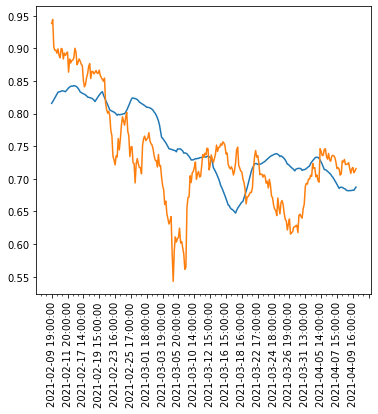

In [ ]:
#print(dates_for_plot[0:1363])
y_hat_np=np.array(y_hat)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(top=51,bottom = 50)
print(y_hat_np.shape)
print(dates_for_plot.shape)
plt.plot(dates_for_plot,y_hat_np[:,0,0])
print(features.tail())
print(features.loc[label_start+sequence_length-1 : ,0])
plt.plot(dates_for_plot,features.loc[label_start+sequence_length-1 : ,0])